# Importing libraries


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Load data


In [3]:
kickstarter_df = pd.read_csv("./data/kickstarter_data_full.csv", low_memory=False)

# Drop unnecessary columns


In [4]:
kickstarter_df.drop(columns=["index", "Unnamed: 0", "id"], inplace=True)


# Naive feature selection


## Remove features with more that 50% missing values


In [6]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20626 non-null  object 
 4   goal                         20632 non-null  float64
 5   pledged                      20632 non-null  float64
 6   state                        20632 non-null  object 
 7   slug                         20632 non-null  object 
 8   disable_communication        20632 non-null  bool   
 9   country                      20632 non-null  object 
 10  currency                     20632 non-null  object 
 11  currency_symbol              20632 non-null  object 
 12  currency_trailing_code       20632 non-null  bool   
 13  deadline        

In [7]:
kickstarter_df.drop(
    columns=["friends", "is_starred", "is_backing", "permissions"], inplace=True
)

## Remove features with zero variance


In [8]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]

Series([], dtype: int64)

## Check rows with missing values


In [9]:
kickstarter_df.isnull().any(axis=1).sum()

1937

### check if the relevant features have missing values


In [10]:
kickstarter_df[
    kickstarter_df[
        ["backers_count", "goal", "pledged", "usd_pledged", "SuccessfulBool"]
    ]
    .isnull()
    .any(axis=1)
]

,index,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend


## Check the cases of the "state" (dependent) variable


In [11]:
kickstarter_df["SuccessfulBool"].value_counts()

SuccessfulBool
0    14614
1     6018
Name: count, dtype: int64

In [12]:
kickstarter_df.describe().astype("Float64")

,index,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,...,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
count,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20627.0,20627.0,20627.0,20627.0,...,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0
mean,10315.5,94104.965285,21392.675739,183.675843,1.039363,20915.907911,5.940806,5.292578,18.991177,13.081204,...,2014.752084,12.417168,49.577598,34.716896,31.169397,0.291683,0.806466,0.816208,0.225136,0.292022
std,5956.089713,1335511.390003,120497.251802,1222.012658,0.230419,115471.73309,2.826118,2.418168,4.632371,3.283547,...,1.261752,5.574409,111.094601,11.873143,14.279705,0.454548,0.395078,0.387324,0.417682,0.454703
min,0.0,1.0,0.0,0.0,0.045641,0.0,1.0,1.0,1.0,1.0,...,2009.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5157.75,4000.0,25.0,2.0,1.0,25.0,4.0,3.0,17.0,11.0,...,2014.0,9.0,3.0,30.0,28.0,0.0,1.0,1.0,0.0,0.0
50%,10315.5,14000.0,695.0,12.0,1.0,716.301193,6.0,5.0,20.0,13.0,...,2015.0,12.0,14.0,30.0,30.0,0.0,1.0,1.0,0.0,0.0
75%,15473.25,50000.0,5954.25,63.0,1.0,6004.628177,8.0,7.0,22.0,15.0,...,2016.0,16.0,45.0,40.0,35.0,1.0,1.0,1.0,0.0,1.0
max,20631.0,100000000.0,6225354.98,105857.0,1.715913,6225354.98,16.0,14.0,35.0,30.0,...,2017.0,23.0,1754.0,91.0,91.0,1.0,1.0,1.0,1.0,1.0


In [12]:
kickstarter_numeric_df = kickstarter_df.select_dtypes(include=["number"]).drop(
    columns="index"
)

### xgboost for feature importance on a classification problem


In [14]:
import plotly.graph_objects as go
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(
    kickstarter_numeric_df.drop(columns=["SuccessfulBool"]),
    kickstarter_numeric_df["SuccessfulBool"],
)
feature_importance_df = pd.DataFrame(
    {
        "feature": kickstarter_numeric_df.drop(columns=["SuccessfulBool"]).columns,
        "importance": xgb_model.feature_importances_,
    }
)
feature_importance_df.sort_values(by="importance", ascending=False, inplace=True)
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=feature_importance_df["feature"],
        y=feature_importance_df["importance"],
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Feature Importance",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

### hirarchical clustering kickstarter_numeric_df


In [15]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(
    kickstarter_numeric_df.corr(),
    orientation="left",
    labels=kickstarter_numeric_df.columns,
)
fig.update_layout(
    title="Dendrogram",
    title_x=0.5,
    width=1000,
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

# Hypothesis 1: The goal amount and the pledged amount have influence on the success of the project


# Hypothesis 2: The number of backers have impact on the success of the project


### The model will answer both hypotheses


In [89]:
h1_h2_df = kickstarter_df[
    [
        "backers_count",
        "goal",
        "usd_pledged",  # normalized
        "SuccessfulBool",
        "static_usd_rate",
    ]
]

In [90]:
# check if there is any 0 in static_usd_rate
h1_h2_df[h1_h2_df["static_usd_rate"] == 0]

,backers_count,goal,usd_pledged,SuccessfulBool,static_usd_rate


In [91]:
# convert goal to usd
h1_h2_df["usd_goal"] = h1_h2_df["goal"] * h1_h2_df["static_usd_rate"]  # normalized


In [92]:
# after converting goal to usd, remove goal and static_usd_rate
h1_h2_df.drop(columns=["goal", "static_usd_rate"], inplace=True)

# Theoretical statistics


### bar plot for the cases of success and failure


In [93]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=["Failed", "Successful"],
        y=h1_h2_df["SuccessfulBool"].value_counts().values,
        marker_color=["rgb(251, 171, 171)", "rgb(171, 226, 251)"],
        # percentage label
        text=[
            str(np.round(val / h1_h2_df["SuccessfulBool"].shape[0] * 100, 2)) + "%"
            for val in h1_h2_df["SuccessfulBool"].value_counts().values
        ],
        textposition="auto",
    )
)
fig.update_layout(
    title="Number of Successful and Failed Projects",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

### splom plot for the numeric variables


In [94]:
fig = go.Figure()
fig.add_trace(
    go.Splom(
        dimensions=[
            dict(label="backers_count", values=h1_h2_df["backers_count"]),
            dict(label="usd_goal", values=h1_h2_df["usd_goal"]),
            dict(label="usd_pledged", values=h1_h2_df["usd_pledged"]),
        ],
        text=[
            "Failed" if val == 0 else "Successful" for val in h1_h2_df["SuccessfulBool"]
        ],
        marker=dict(
            color=h1_h2_df["SuccessfulBool"],
            colorscale=[[0, "rgb(251, 100, 100)"], [1, "rgb(100, 100, 251)"]],
        ),
        customdata=h1_h2_df["SuccessfulBool"],
        hovertemplate="<b>backers_count</b>:"
        + "%{x}<br><b>usd_goal</b>:"
        + "%{y}<br><b>usd_pledged</b>:"
        + "%{z}<br><b>Successful</b>:"
        + "%{customdata}",
    )
)
fig.update_layout(
    title="Scatterplot Matrix for Numeric Variables",
    title_x=0.5,
    width=800,
    height=800,
)
fig.show()

### Correlation Matrix


In [27]:
corr = h1_h2_df.corr()
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
)
fig.update_layout(
    title="Correlation Matrix for Numeric Variables",
    title_font_size=20,
    title_x=0.5,
    width=800,
    height=800,
    font=dict(size=14),
)
fig.show()

### scatter plot for the relationship between usd_goal and usd_pledged


In [40]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=h1_h2_df["usd_goal"],
        y=h1_h2_df["usd_pledged"],
        mode="markers",
        marker=dict(
            color=h1_h2_df["SuccessfulBool"],
            colorscale=[[0, "rgb(251, 100, 100)"], [1, "rgb(100, 100, 251)"]],
        ),
        customdata=h1_h2_df["SuccessfulBool"],
        hovertemplate="<b>usd_goal</b>: %{x}<br><b>usd_pledged</b>: %{y}<br><b>Successful</b>: %{customdata}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, h1_h2_df["usd_goal"].max()],
        y=[0, h1_h2_df["usd_goal"].max()],
        mode="lines",
        marker=dict(color="rgb(0, 0, 0)"),
        hoverinfo="skip",
    )
)
fig.update_layout(
    title="Scatterplot for the Ratio between usd_pledged and usd_goal",
    title_x=0.5,
    width=800,
    height=800,
)
fig.show()

# Split to X and y


In [41]:
X = h1_h2_df.drop(columns="SuccessfulBool")
y = h1_h2_df["SuccessfulBool"]

# Split to train and test


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# KNN


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=7)  # n_neighbors=7 is the optimal value


In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
predictions_knn_train = knn.predict(X_train)
predictions_knn_test = knn.predict(X_test)

In [48]:
train_results_knn = pd.DataFrame(
    {"y_train": y_train, "predictions": knn.predict(X_train)}
)
test_results_knn = pd.DataFrame({"y_test": y_test, "predictions": knn.predict(X_test)})

In [49]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


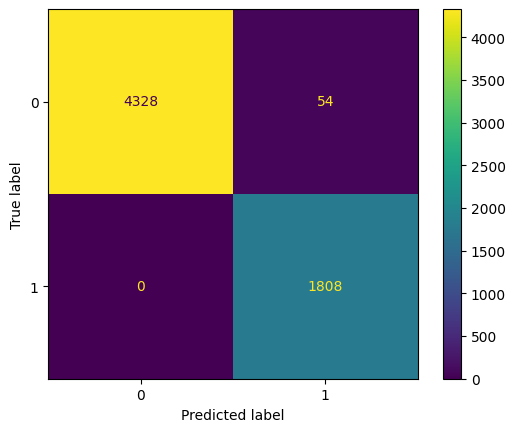

In [50]:
cm = confusion_matrix(y_test, predictions_knn_test, labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()

In [51]:
print("classification report for knn with k=7 (train)")
print(classification_report(y_train, predictions_knn_train))
print("classification report for knn with k=7 (test)")
print(classification_report(y_test, predictions_knn_test))

classification report for knn with k=7 (train)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10232
           1       0.96      1.00      0.98      4210

    accuracy                           0.99     14442
   macro avg       0.98      0.99      0.99     14442
weighted avg       0.99      0.99      0.99     14442

classification report for knn with k=7 (test)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4382
           1       0.97      1.00      0.99      1808

    accuracy                           0.99      6190
   macro avg       0.99      0.99      0.99      6190
weighted avg       0.99      0.99      0.99      6190



In [95]:
# auc score
from sklearn.metrics import roc_auc_score

print("auc score for knn with k=7 (train)")
print(roc_auc_score(y_train, predictions_knn_train))

auc score for knn with k=7 (train)
0.9914551990030811


### check for optimal k


In [90]:
l = []
for i in range(1, 201, 2):
    knni = KNeighborsClassifier(n_neighbors=i)
    knni.fit(X_train, y_train)
    predictions_knni_test = knni.predict(X_test)
    l.append((i, knni.score(X_test, y_test)))

In [91]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",  # NOSONAR
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs K",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


# Logistic Reggression


In [52]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

In [53]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [54]:
predictions_logistic_regression_train = logistic_regression.predict(X_train)
predictions_logistic_regression_test = logistic_regression.predict(X_test)

In [55]:
train_result_logistic_regression = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_logistic_regression_train}
)
test_result_logistic_regression = pd.DataFrame(
    {"y_test": y_test, "predictions": predictions_logistic_regression_test}
)

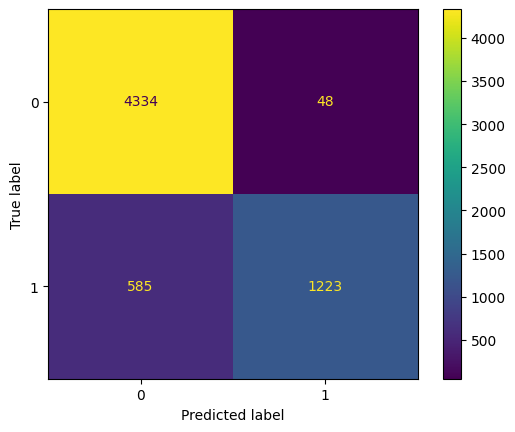

In [56]:
cm = confusion_matrix(y_test, predictions_logistic_regression_test)
ConfusionMatrixDisplay(cm).plot()

In [57]:
print("classification report for logistic regression (train)")
print(classification_report(y_train, predictions_logistic_regression_train))
print("classification report for logistic regression (test)")
print(classification_report(y_test, predictions_logistic_regression_test))

classification report for logistic regression (train)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10232
           1       0.96      0.66      0.78      4210

    accuracy                           0.89     14442
   macro avg       0.92      0.83      0.86     14442
weighted avg       0.90      0.89      0.89     14442

classification report for logistic regression (test)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4382
           1       0.96      0.68      0.79      1808

    accuracy                           0.90      6190
   macro avg       0.92      0.83      0.86      6190
weighted avg       0.90      0.90      0.89      6190



In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

predictions_proba = logistic_regression.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, predictions_logistic_regression_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba[:, 1])

In [60]:
print("roc_auc_score: ", roc_auc)

roc_auc_score:  0.8327420753848206


In [59]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name="ROC curve (area = %0.2f)" % roc_auc,
        line=dict(color="darkorange", width=2),
        text=thresholds,
        hovertemplate="fpr: %{x:.2f}<br>tpr: %{y:.2f}<br>threshold: %{text:.2f}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        name="Random guess",
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    title="Receiver Operating Characteristic",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

### change the threshold to optimize the model (0.44)


In [61]:
predictions044 = [1 if x > 0.44 else 0 for x in predictions_proba[:, 1]]
test_results044 = pd.DataFrame({"y_test": y_test, "predictions": predictions044})

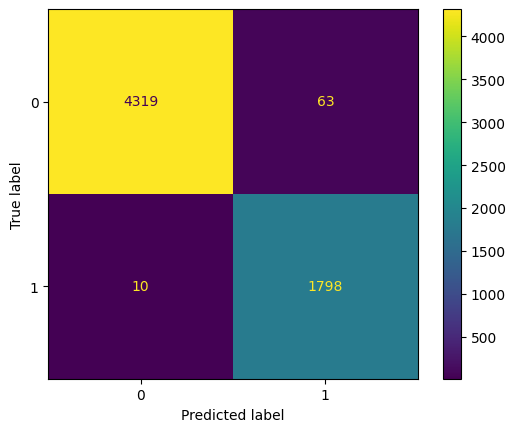

In [62]:
cm = confusion_matrix(y_test, predictions044)
ConfusionMatrixDisplay(cm).plot()

In [63]:
print(classification_report(y_test, predictions044))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4382
           1       0.97      0.99      0.98      1808

    accuracy                           0.99      6190
   macro avg       0.98      0.99      0.99      6190
weighted avg       0.99      0.99      0.99      6190



# Random forest


In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(600, random_state=42, criterion="entropy")

In [65]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=600, random_state=42)

In [66]:
predictions_rf_train = rf.predict(X_train)
predictions_rf_test = rf.predict(X_test)

In [67]:
train_result_rf = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_rf_train}
)
test_result_rf = pd.DataFrame({"y_test": y_test, "predictions": predictions_rf_test})

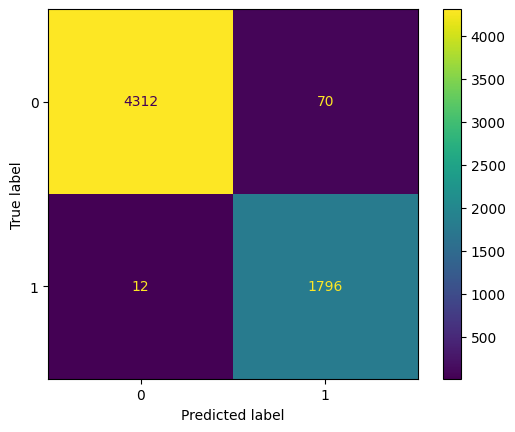

In [68]:
cm = confusion_matrix(y_test, predictions_rf_test)
ConfusionMatrixDisplay(cm).plot()

In [69]:
print("classification report for random forest (train)")
print(classification_report(y_train, predictions_rf_train))
print("classification report for random forest (test)")
print(classification_report(y_test, predictions_rf_test))

classification report for random forest (train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10232
           1       1.00      1.00      1.00      4210

    accuracy                           1.00     14442
   macro avg       1.00      1.00      1.00     14442
weighted avg       1.00      1.00      1.00     14442

classification report for random forest (test)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4382
           1       0.96      0.99      0.98      1808

    accuracy                           0.99      6190
   macro avg       0.98      0.99      0.98      6190
weighted avg       0.99      0.99      0.99      6190



### optimization of random forest to select the best parameters


In [48]:
l = []
for i in range(100, 1000, 100):
    print(i, end="\r")
    rfi = RandomForestClassifier(i, random_state=42, criterion="entropy")
    rfi.fit(X_train, y_train)
    predictions_rfi_test = rfi.predict(X_test)
    l.append((i, rfi.score(X_test, y_test)))

### plot accuracy vs n_estimators


In [49]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs n_estimators",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


# Decision tree


In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion="entropy")

In [71]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [72]:
predictions_dt_train = dt.predict(X_train)
predictions_dt_test = dt.predict(X_test)

In [73]:
train_result_dt = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_dt_train}
)
test_result_dt = pd.DataFrame({"y_test": y_test, "predictions": predictions_dt_test})

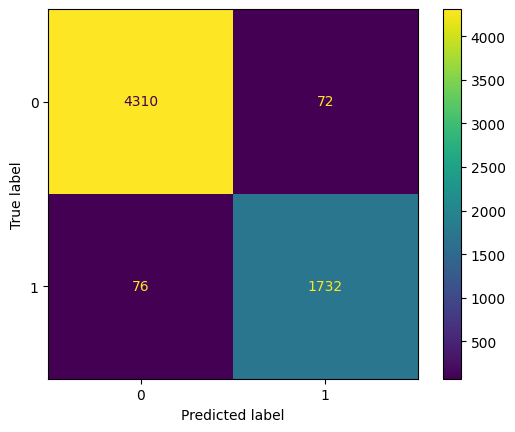

In [74]:
cm = confusion_matrix(y_test, predictions_dt_test)
ConfusionMatrixDisplay(cm).plot()

In [75]:
print("classification report for decision tree (train)")
print(classification_report(y_train, predictions_dt_train))
print("classification report for decision tree (test)")
print(classification_report(y_test, predictions_dt_test))

classification report for decision tree (train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10232
           1       1.00      1.00      1.00      4210

    accuracy                           1.00     14442
   macro avg       1.00      1.00      1.00     14442
weighted avg       1.00      1.00      1.00     14442

classification report for decision tree (test)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4382
           1       0.96      0.96      0.96      1808

    accuracy                           0.98      6190
   macro avg       0.97      0.97      0.97      6190
weighted avg       0.98      0.98      0.98      6190



### select best max_depth


In [62]:
l = []
for i in range(1, 20):
    print(i, end="\r")
    dti = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=i)
    dti.fit(X_train, y_train)
    predictions_dt = dti.predict(X_test)
    l.append((i, dti.score(X_test, y_test)))

In [63]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs max_depth",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


In [76]:
dt_pruned = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=10)

In [77]:
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [78]:
predictions_dt_pruned_train = dt_pruned.predict(X_train)
predictions_dt_pruned_test = dt_pruned.predict(X_test)

In [79]:
train_result_dt_pruned = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_dt_pruned_train}
)
test_result_dt_pruned = pd.DataFrame(
    {"y_test": y_test, "predictions": predictions_dt_pruned_test}
)

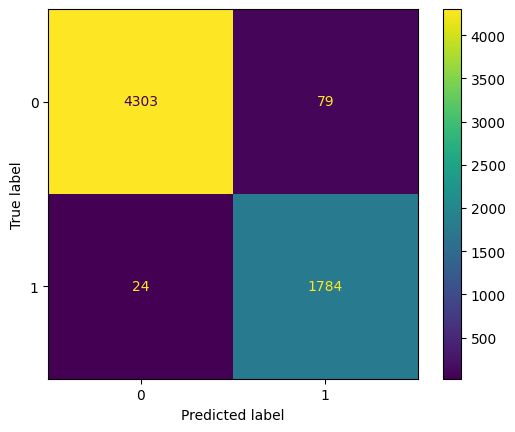

In [80]:
cm = confusion_matrix(y_test, predictions_dt_pruned_test)
ConfusionMatrixDisplay(cm).plot()

In [81]:
print("classification report for decision tree (train)")
print(classification_report(y_train, predictions_dt_pruned_train))
print("classification report for decision tree (test)")
print(classification_report(y_test, predictions_dt_pruned_test))

classification report for decision tree (train)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10232
           1       0.97      1.00      0.99      4210

    accuracy                           0.99     14442
   macro avg       0.99      0.99      0.99     14442
weighted avg       0.99      0.99      0.99     14442

classification report for decision tree (test)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4382
           1       0.96      0.99      0.97      1808

    accuracy                           0.98      6190
   macro avg       0.98      0.98      0.98      6190
weighted avg       0.98      0.98      0.98      6190

